# General Overview - Data Storytelling and Visualization

We are looking for correlations between the independent variables and the target variable, the likelihood of being readmitted to the hospital, using graphs and plots. This is also a good time to get a better understanding of patient demographics, their experiences at the hospital, medications being used / not used, and any diagnosed conditions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas.util.testing as tm

sns.set(style='darkgrid')
%matplotlib inline

/Users/annatang/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('diabetes_cleaned.csv', index_col=0) # import data
diabetes = data.copy() # save a copy of data as diabetes

In [3]:
diabetes.shape

(67874, 43)

In [4]:
diabetes.head()

,patient_nbr,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type
0,8222157,Caucasian,Female,[0-10),Unknown,1,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,NO,Unknown
1,55629189,Caucasian,Female,[10-20),Home,7,3,Unknown,59,0,...,No,No,Up,No,No,No,Ch,Yes,YES,Emergency
2,86047875,AfricanAmerican,Female,[20-30),Home,7,2,Unknown,11,5,...,No,No,No,No,No,No,No,Yes,NO,Emergency
3,82442376,Caucasian,Male,[30-40),Home,7,2,Unknown,44,1,...,No,No,Up,No,No,No,Ch,Yes,NO,Emergency
4,42519267,Caucasian,Male,[40-50),Home,7,1,Unknown,51,0,...,No,No,Steady,No,No,No,Ch,Yes,NO,Emergency


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67874 entries, 0 to 67873
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               67874 non-null  int64 
 1   race                      67874 non-null  object
 2   gender                    67874 non-null  object
 3   age                       67874 non-null  object
 4   discharge_disposition_id  67874 non-null  object
 5   admission_source_id       67874 non-null  int64 
 6   time_in_hospital          67874 non-null  int64 
 7   medical_specialty         67874 non-null  object
 8   num_lab_procedures        67874 non-null  int64 
 9   num_procedures            67874 non-null  int64 
 10  num_medications           67874 non-null  int64 
 11  number_outpatient         67874 non-null  int64 
 12  number_emergency          67874 non-null  int64 
 13  number_inpatient          67874 non-null  int64 
 14  diag_1                

Columns use num and number in their names, so to keep them consistent, all columns will use num.

In [6]:
diabetes = diabetes.rename(columns={'number_outpatient':'num_outpatient', 
                                    'number_emergency':'num_emergency', 
                                    'number_inpatient':'num_inpatient', 
                                    'number_diagnoses':'num_diagnoses'})

In [7]:
# drop the patient number column since each patient is unique
diabetes = diabetes.drop(columns=['patient_nbr'])

In [8]:
round(diabetes.describe(), 2)

,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses
count,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00
mean,4.42,4.28,42.85,1.43,15.67,0.28,0.11,0.18,7.25
std,2.97,2.94,19.93,1.76,8.28,1.07,0.52,0.61,1.99
min,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
25%,1.00,2.00,31.00,0.00,10.00,0.00,0.00,0.00,6.00
50%,7.00,3.00,44.00,1.00,14.00,0.00,0.00,0.00,8.00
75%,7.00,6.00,57.00,2.00,20.00,0.00,0.00,0.00,9.00
max,25.00,14.00,132.00,6.00,81.00,42.00,42.00,12.00,16.00


# readmitted patients overall

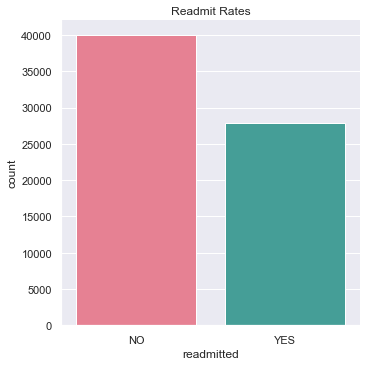

In [9]:
sns.catplot(x='readmitted', kind='count', palette='husl', data=diabetes)
plt.title('Readmit Rates')
plt.show()

In [10]:
round(diabetes.readmitted.value_counts(normalize=True), 4) * 100

NO     58.93
YES    41.07
Name: readmitted, dtype: float64

Around 59% of patients do not come back compared to 41% of patients who are readmitted.

In [11]:
# shows the numbers for each comparison and their totals
def chart_display(x, y):
    return pd.crosstab(x, y, margins=True, margins_name='Total')

# demographics

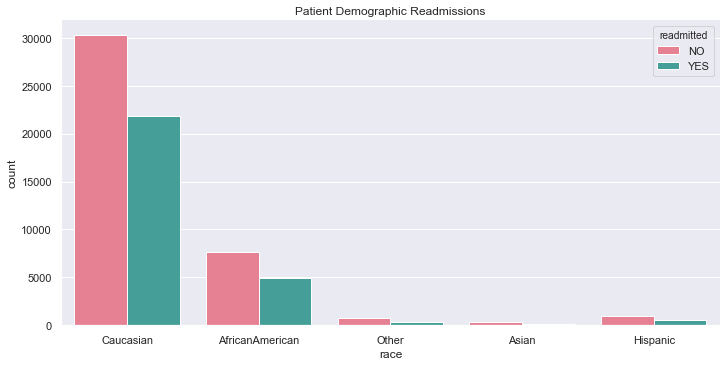

In [12]:
sns.catplot(x='race', hue='readmitted', kind='count', palette='husl', data=diabetes, aspect=2, legend_out=False)
plt.title('Patient Demographic Readmissions')
plt.show()

In [13]:
chart_display(diabetes.race, diabetes.readmitted)

readmitted,NO,YES,Total
race,,,
AfricanAmerican,7638,4956,12594
Asian,340,148,488
Caucasian,30299,21849,52148
Hispanic,964,531,1495
Other,759,390,1149
Total,40000,27874,67874


# gender

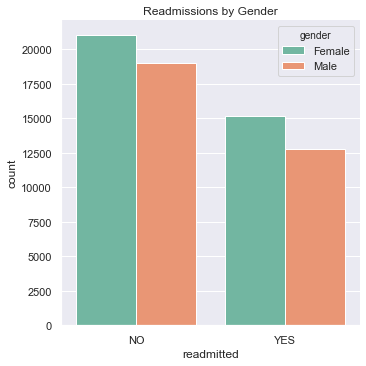

In [14]:
sns.catplot(x='readmitted', hue='gender', kind='count', palette='Set2', data=diabetes, legend_out=False)
plt.title('Readmissions by Gender')
plt.show()

In [15]:
chart_display(diabetes.gender, diabetes.readmitted)

readmitted,NO,YES,Total
gender,,,
Female,21035,15129,36164
Male,18965,12745,31710
Total,40000,27874,67874


# age groups

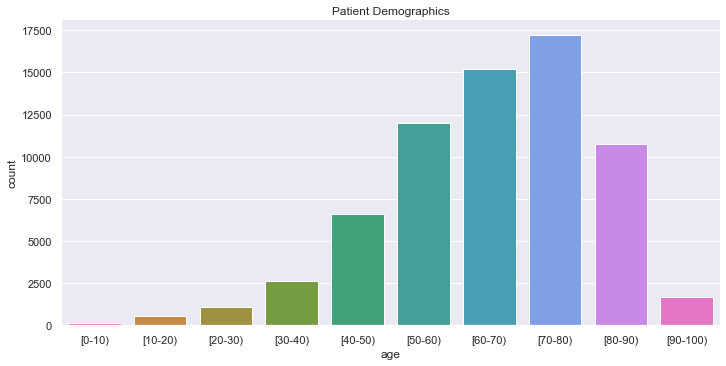

In [16]:
sns.catplot(x='age', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('Patient Demographics')
plt.show()

It looks like most patients are older, 50+ years old, though there aren't many patients over 90.

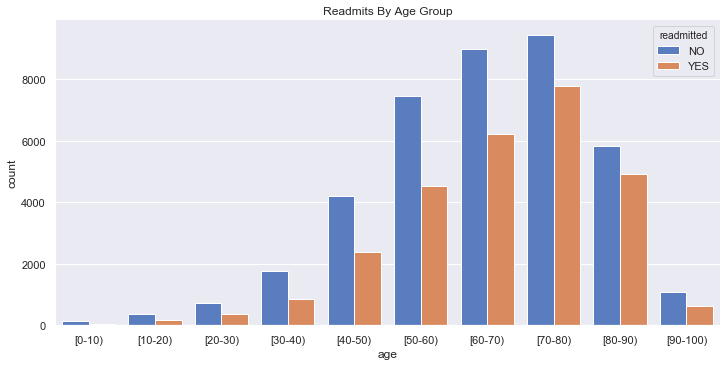

In [17]:
sns.catplot(x='age', hue='readmitted', kind='count', palette='muted', aspect=2, data=diabetes, legend_out=False)
plt.title('Readmits By Age Group')
plt.show()

In every age group, more patients are not readmitted. The 70-80 age group account has the highest number of readmitted and not readmitted patients.

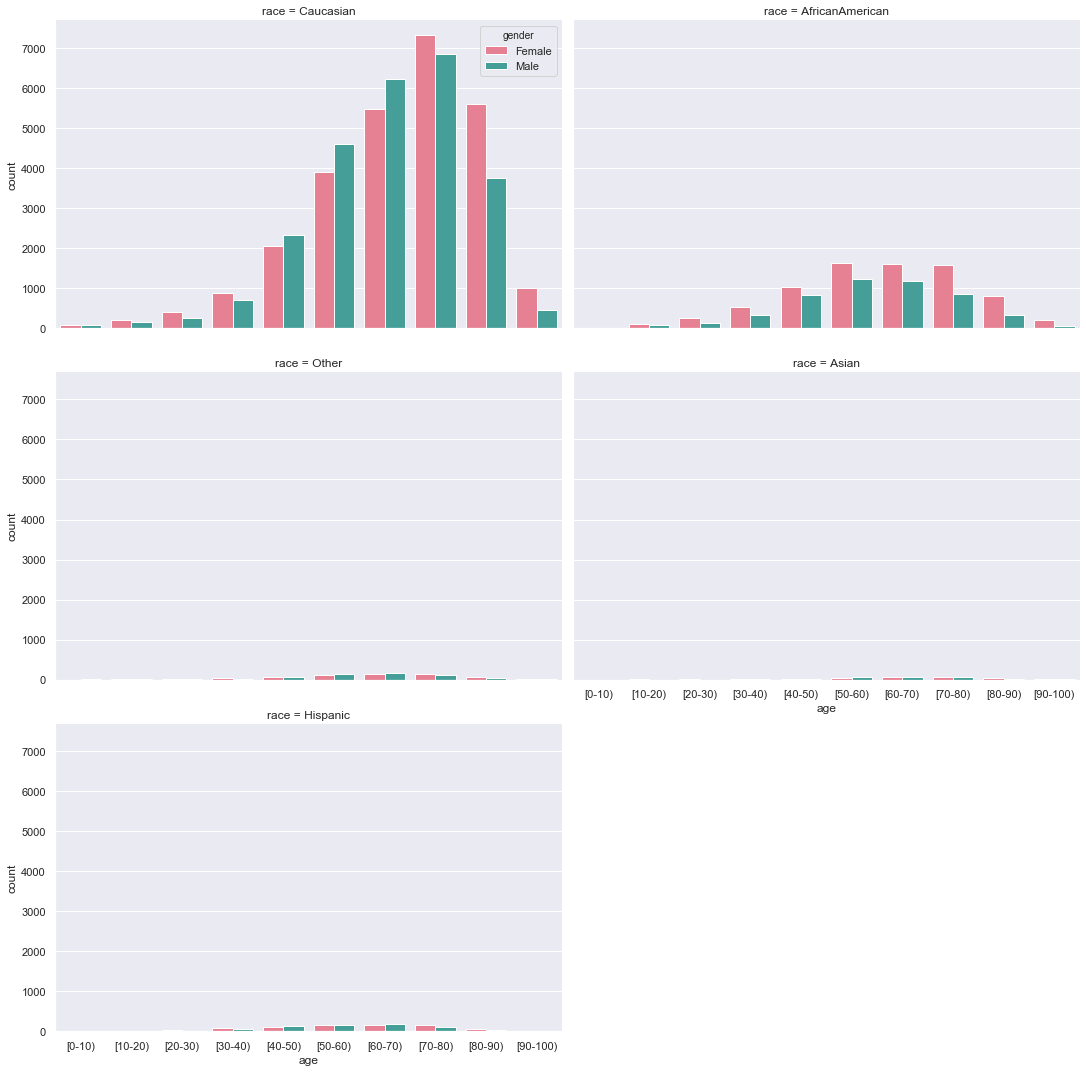

In [18]:
sns.catplot(x='age', hue='gender', col='race', col_wrap=2, palette='husl', data=diabetes, aspect=1.5, kind='count', legend_out=False)
plt.show()

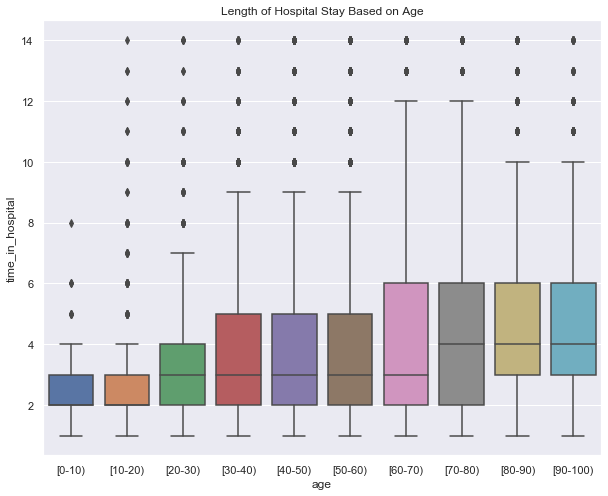

In [19]:
# who is spending the most time in hospitals during visits?
plt.figure(figsize=(10, 8))
sns.boxplot(x='age', y='time_in_hospital', data=diabetes)
plt.title('Length of Hospital Stay Based on Age')
plt.show()

The majority of patients are Caucasian. There are more female patients than males.

# admission type

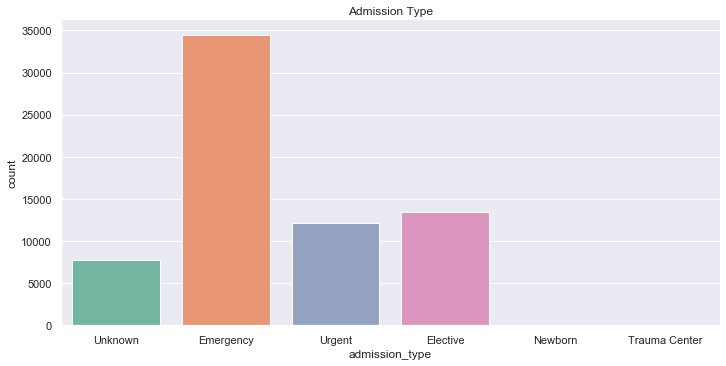

In [20]:
sns.catplot(x='admission_type', kind='count', palette='Set2', data=diabetes, aspect=2)
plt.title('Admission Type')
plt.show()

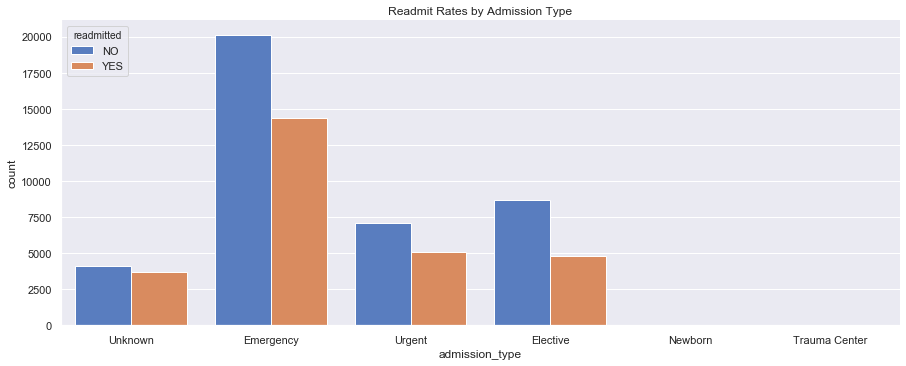

In [21]:
sns.catplot(x='admission_type', hue='readmitted', kind='count', palette='muted', aspect=2.5, data=diabetes, legend_out=False)
plt.title('Readmit Rates by Admission Type')
plt.show()

In [22]:
chart_display(diabetes.readmitted, diabetes.admission_type)

admission_type,Elective,Emergency,Newborn,Trauma Center,Unknown,Urgent,Total
readmitted,,,,,,,
NO,8663,20116,6,17,4109,7089,40000
YES,4781,14357,3,0,3663,5070,27874
Total,13444,34473,9,17,7772,12159,67874


# discharge disposition

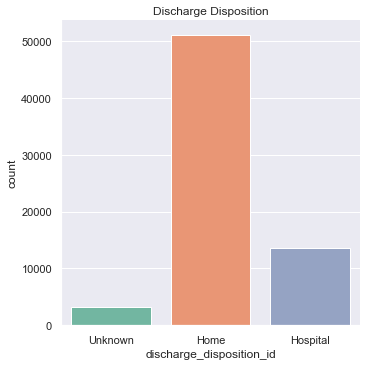

In [23]:
sns.catplot(x='discharge_disposition_id', kind='count', palette='Set2', data=diabetes, aspect=1)
plt.title('Discharge Disposition')
plt.show()

The majority of patients went home after being discharged from the hospital while others transferred to another health care facility / hospital.

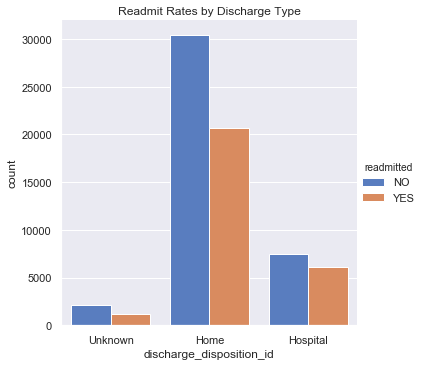

In [24]:
sns.catplot(x='discharge_disposition_id', hue='readmitted', kind='count', palette='muted', data=diabetes)
plt.title('Readmit Rates by Discharge Type')
plt.show()

In [25]:
chart_display(diabetes.readmitted, diabetes.discharge_disposition_id)

discharge_disposition_id,Home,Hospital,Unknown,Total
readmitted,,,,
NO,30438,7470,2092,40000
YES,20643,6106,1125,27874
Total,51081,13576,3217,67874


Since we took the original responses and grouped them into one of three categories, this column will not be used to build the machine learning model.

In [26]:
# drop discharge disposition id
diabetes = diabetes.drop(columns=['discharge_disposition_id'])

# admission source

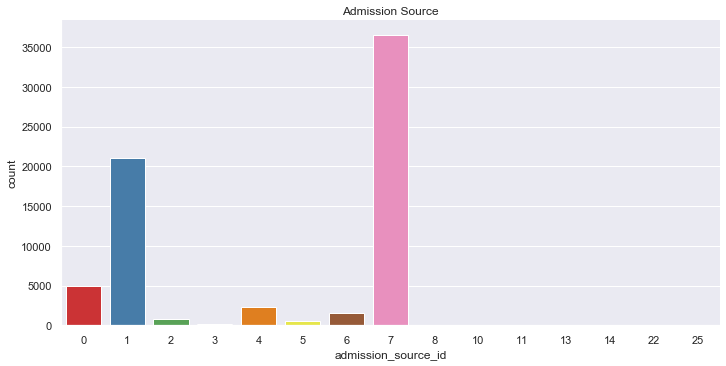

In [27]:
sns.catplot(x='admission_source_id', kind='count', palette='Set1', data=diabetes, aspect=2)
plt.title('Admission Source')
plt.show()

Most patients are admitted via the emergency room, or ID 7, while others came with a physician referral, or ID 1.

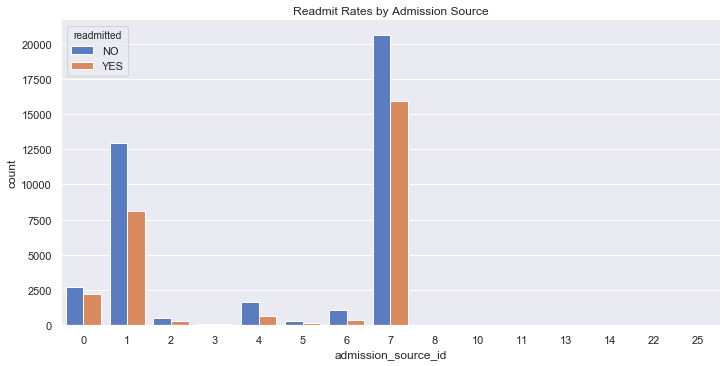

In [28]:
sns.catplot(x='admission_source_id', hue='readmitted', kind='count', palette='muted', aspect=2, data=diabetes, legend_out=False)
plt.title('Readmit Rates by Admission Source')
plt.show()

In [29]:
# drop admission source id since each id correlates to a string
diabetes = diabetes.drop(columns=['admission_source_id'])

# time in hospital

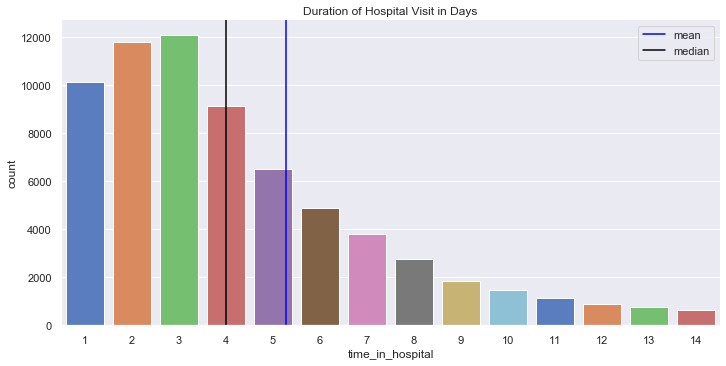

In [30]:
sns.catplot(x='time_in_hospital', kind='count', palette='muted', data=diabetes, aspect=2)
plt.axvline(np.mean(diabetes.time_in_hospital), color='blue', label='mean')
plt.axvline(np.median(diabetes.time_in_hospital), color='black', label='median')
plt.title('Duration of Hospital Visit in Days')
plt.legend()
plt.show()

In [31]:
print('Average time spent in hospital: {} days'.format(round(np.mean(diabetes.time_in_hospital), 2)))
print('Median time spent in hospital: {} days'.format(round(np.median(diabetes.time_in_hospital), 2)))

Average time spent in hospital: 4.28 days
Median time spent in hospital: 3.0 days


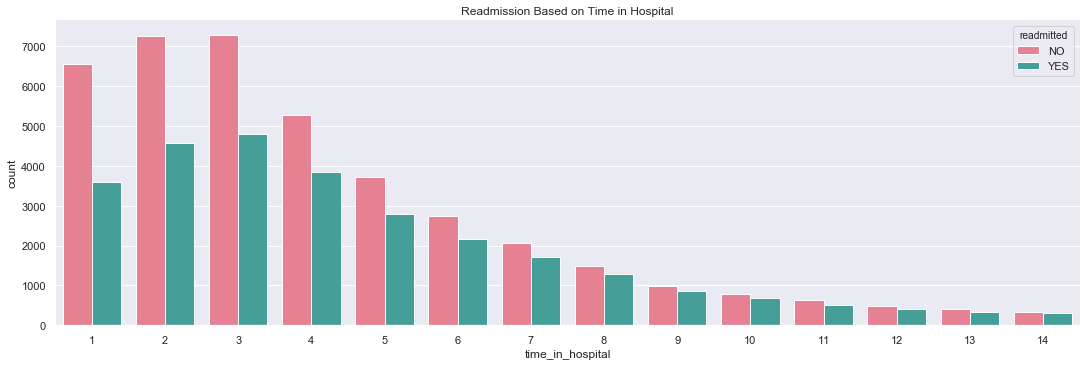

In [32]:
# does the amount of time spent in the hospital impact a patient's chances of readmission?
sns.catplot(x='time_in_hospital', hue='readmitted', kind='count', palette='husl', aspect=3, data=diabetes, legend_out=False)
plt.title('Readmission Based on Time in Hospital')
plt.show()

Based on the graph, the longer a patient spends in the hospital, the likelier their chances are of being readmitted. Patients who spend more than a week in the hospital usually have a serious illness or complication that may reoccur depending on their ability to recover, which is why they may need to revisit the hospital.

# medical specialty

The majority of patients do not have a medical specialty listed for their visit.

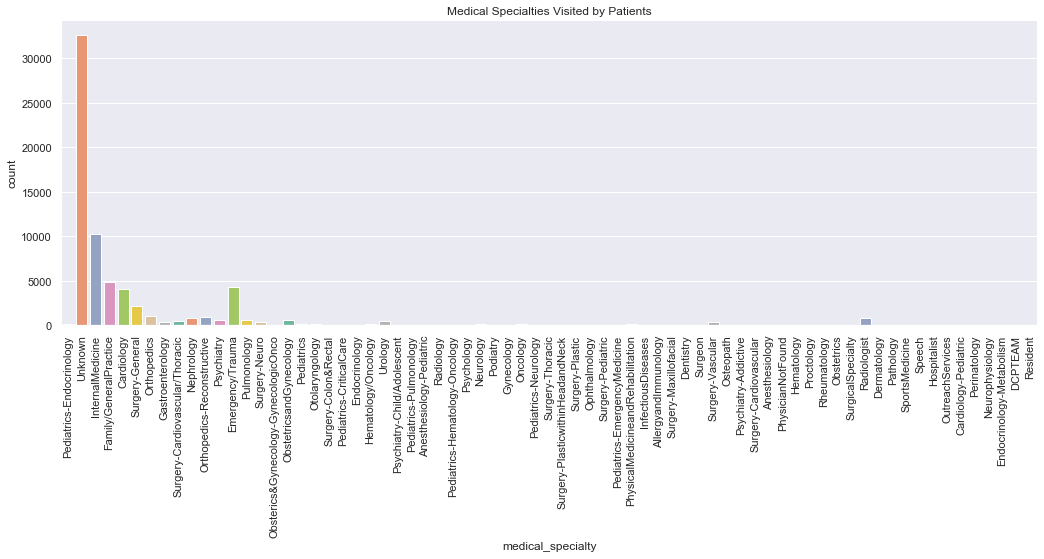

In [33]:
d = sns.catplot(x='medical_specialty', kind='count', palette='Set2', aspect=3, data=diabetes)
d.set_xticklabels(rotation=90)
plt.title('Medical Specialties Visited by Patients')
plt.show()

Since the information on patients' medical specialty is lacking, we are going to remove this column from the dataset.

In [34]:
# drop medical specialty column
diabetes = diabetes.drop(columns=['medical_specialty'])

# number of lab procedures

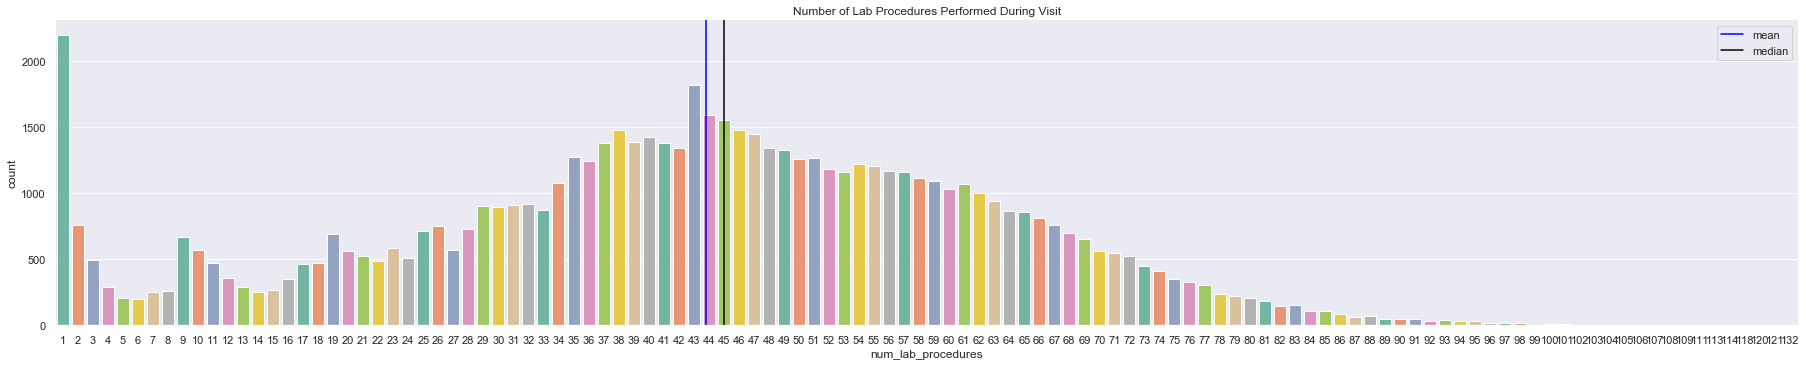

In [35]:
sns.catplot(x='num_lab_procedures', kind='count', palette='Set2', data=diabetes, aspect=5)
plt.axvline(np.mean(diabetes.num_lab_procedures), color='blue', label='mean')
plt.axvline(np.median(diabetes.num_lab_procedures), color='black', label='median')
plt.title('Number of Lab Procedures Performed During Visit')
plt.legend()
plt.show()

In [36]:
print('Lab Tests Performed During Visit')
print('Average: {} procedures'.format(round(np.mean(diabetes.num_lab_procedures), 2)))
print('Median: {} procedures'.format(round(np.median(diabetes.num_lab_procedures), 2)))

Lab Tests Performed During Visit
Average: 42.85 procedures
Median: 44.0 procedures


In [37]:
diabetes.groupby('readmitted')['num_lab_procedures'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,40000.0,41.936625,19.901581,1.0,30.0,43.0,56.0,121.0
YES,27874.0,44.158248,19.907322,1.0,32.0,45.0,58.0,132.0


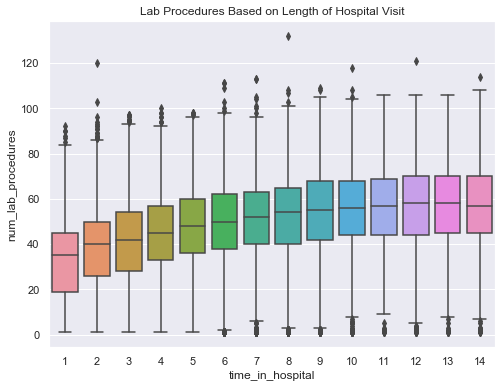

In [38]:
# do patients with longer hospital stays have more lab tests?
plt.figure(figsize=(8, 6))
sns.boxplot(x='time_in_hospital', y='num_lab_procedures', data=diabetes)
plt.title('Lab Procedures Based on Length of Hospital Visit')
plt.show()

There is a positive correlation between time spent in the hospital and number of lab tests completed. After 7 days, the lab test numbers do not change as much as they do for the first seven days.

# number of procedures (other than lab)

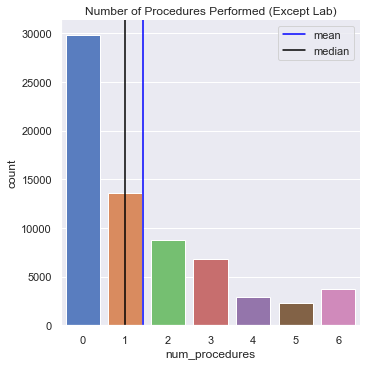

In [39]:
sns.catplot(x='num_procedures', kind='count', palette='muted', data=diabetes)
plt.axvline(np.mean(diabetes.num_procedures), color='blue', label='mean')
plt.axvline(np.median(diabetes.num_procedures), color='black', label='median')
plt.title('Number of Procedures Performed (Except Lab)')
plt.legend()
plt.show()

In [40]:
print('Procedures Performed During Visit Besides Lab:')
print('Average: {} procedures'.format(round(np.mean(diabetes.num_procedures), 2)))
print('Median: {} procedures'.format(round(np.median(diabetes.num_procedures), 2)))

Procedures Performed During Visit Besides Lab:
Average: 1.43 procedures
Median: 1.0 procedures


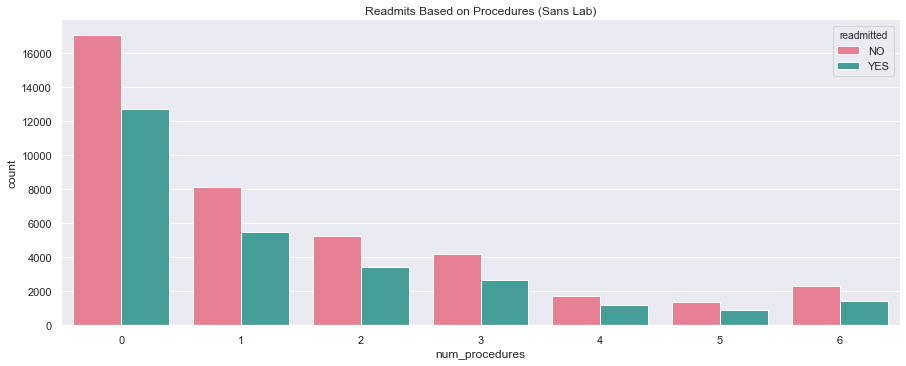

In [41]:
# do the number of tests performed indicate whether a patient will be readmitted?
sns.catplot(x='num_procedures', hue='readmitted', kind='count', palette='husl', aspect=2.5, data=diabetes, legend_out=False)
plt.title('Readmits Based on Procedures (Sans Lab)')
plt.show()

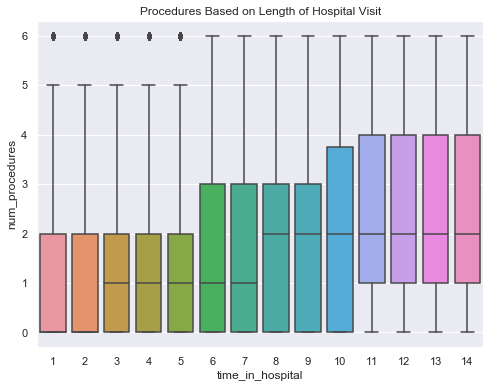

In [42]:
# do patients with longer hospital stays have more procedures?
plt.figure(figsize=(8, 6))
sns.boxplot(x='time_in_hospital', y='num_procedures', data=diabetes)
plt.title('Procedures Based on Length of Hospital Visit')
plt.show()

Patients who spend more time in the hospital have more procedures completed, though most patients have less than 3.

# number of medications

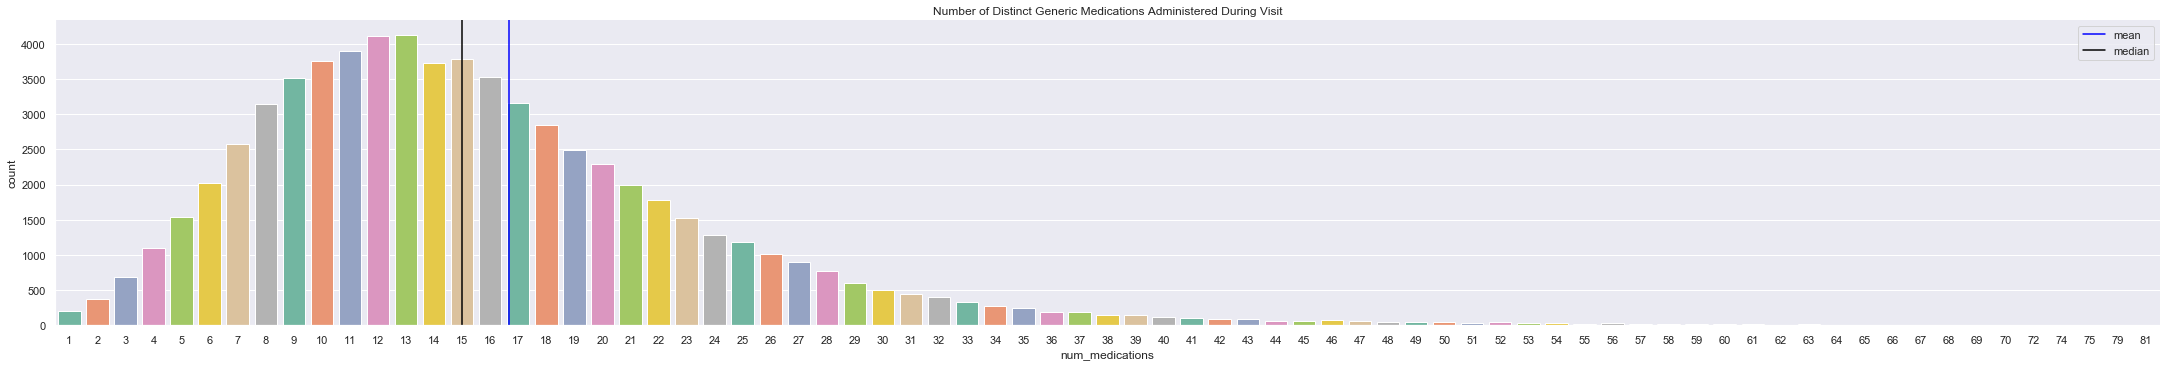

In [43]:
sns.catplot(x='num_medications', kind='count', palette='Set2', data=diabetes, aspect=6)
plt.axvline(np.mean(diabetes.num_medications), color='blue', label='mean')
plt.axvline(np.median(diabetes.num_medications), color='black', label='median')
plt.title('Number of Distinct Generic Medications Administered During Visit')
plt.legend()
plt.show()

In [44]:
print('Distinct Generic Medications Administered During Visit:')
print('Average: {} medications'.format(round(np.mean(diabetes.num_medications), 2)))
print('Median: {} medications'.format(round(np.median(diabetes.num_medications), 2)))

Distinct Generic Medications Administered During Visit:
Average: 15.67 medications
Median: 14.0 medications


In [45]:
diabetes.groupby('readmitted')['num_medications'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,40000.0,15.403850,8.524498,1.0,10.0,14.0,19.0,79.0
YES,27874.0,16.052414,7.898021,1.0,11.0,15.0,20.0,81.0


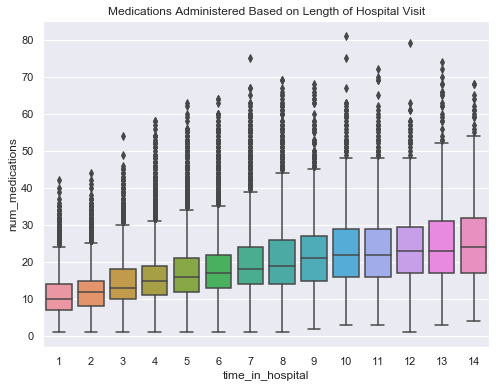

In [46]:
# how many medications are patients receiving during their visit?
plt.figure(figsize=(8, 6))
sns.boxplot(x='time_in_hospital', y='num_medications', data=diabetes)
plt.title('Medications Administered Based on Length of Hospital Visit')
plt.show()

Patients who spend more time in the hospital receive more medications, but there are a few that receive over 60 different kinds of medications.

# number of outpatient visits

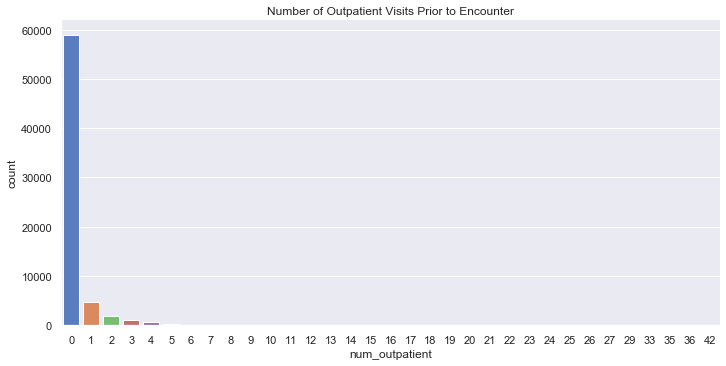

In [47]:
sns.catplot(x='num_outpatient', kind='count', palette='muted', data=diabetes, aspect=2)
plt.title('Number of Outpatient Visits Prior to Encounter')
plt.show()

In [48]:
# outpatient visit stats
diabetes.groupby('readmitted')['num_outpatient'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,40000.0,0.226100,0.919429,0.0,0.0,0.0,0.0,36.0
YES,27874.0,0.365717,1.259668,0.0,0.0,0.0,0.0,42.0


The number of outpatient visits for most patients is 0!

# number of emergency visits

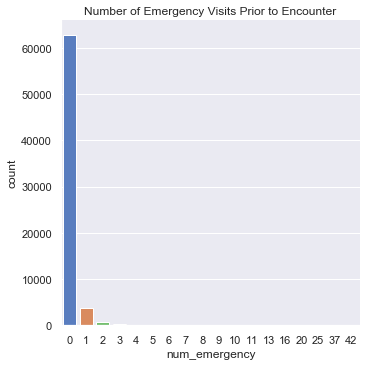

In [49]:
sns.catplot(x='num_emergency', kind='count', palette='muted', data=diabetes)
plt.title('Number of Emergency Visits Prior to Encounter')
plt.show()

In [50]:
diabetes.groupby('readmitted')['num_emergency'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,40000.0,0.073200,0.426141,0.0,0.0,0.0,0.0,37.0
YES,27874.0,0.153297,0.623910,0.0,0.0,0.0,0.0,42.0


The emergency visit numbers are heavily skewed, showing that the majority of patients did not have any visits to the emergency room in the year prior to their current appointment.

# number of inpatient visits

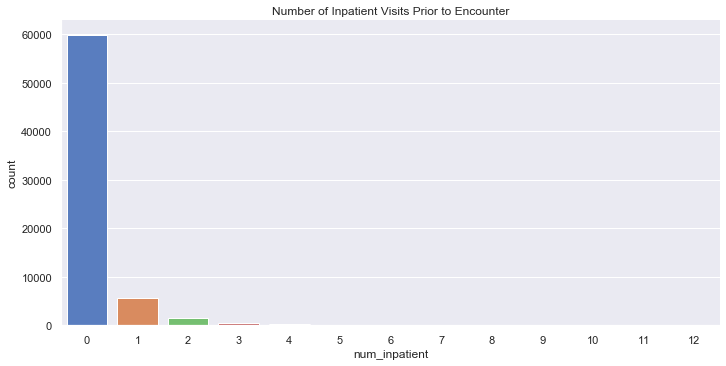

In [51]:
sns.catplot(x='num_inpatient', kind='count', palette='muted', data=diabetes, aspect=2)
plt.title('Number of Inpatient Visits Prior to Encounter')
plt.show()

In [52]:
diabetes.groupby('readmitted')['num_inpatient'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,40000.0,0.104800,0.417458,0.0,0.0,0.0,0.0,10.0
YES,27874.0,0.283849,0.789833,0.0,0.0,0.0,0.0,12.0


Inpatient visits are not common for most patients prior to this visit.

# number of diagnoses

Only the primary diagnosis is used to build the machine learning model since the most common diagnoses are prevalent in all three diagnoses listed.

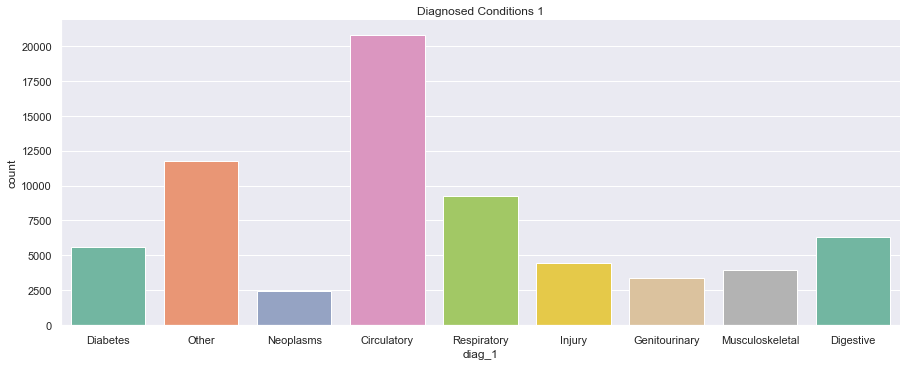

In [53]:
sns.catplot(x='diag_1', kind='count', palette='Set2', data=diabetes, aspect=2.5)
plt.title('Diagnosed Conditions 1')
plt.show()

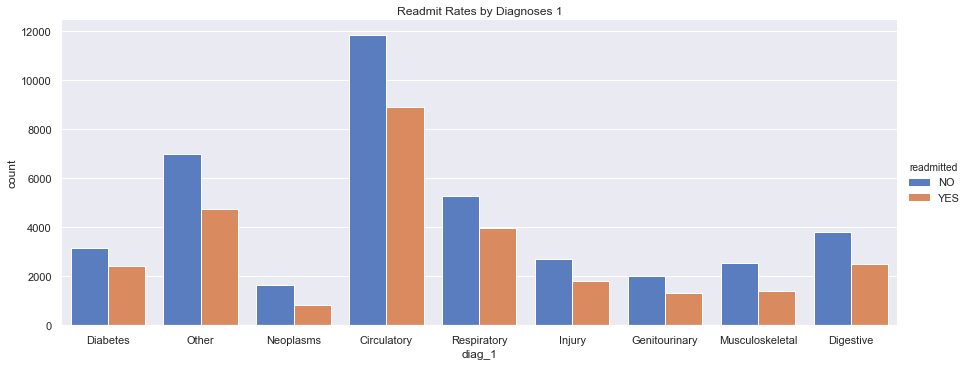

In [54]:
sns.catplot(x='diag_1', hue='readmitted', kind='count', palette='muted', aspect=2.5, data=diabetes)
plt.title('Readmit Rates by Diagnoses 1')
plt.show()

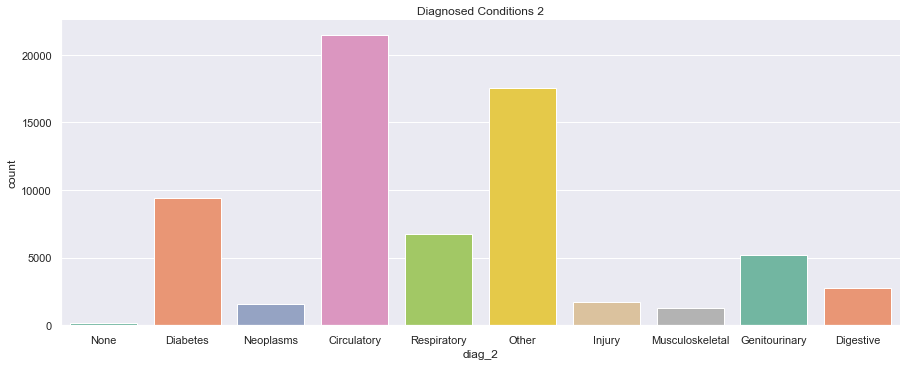

In [55]:
sns.catplot(x='diag_2', kind='count', palette='Set2', data=diabetes, aspect=2.5)
plt.title('Diagnosed Conditions 2')
plt.show()

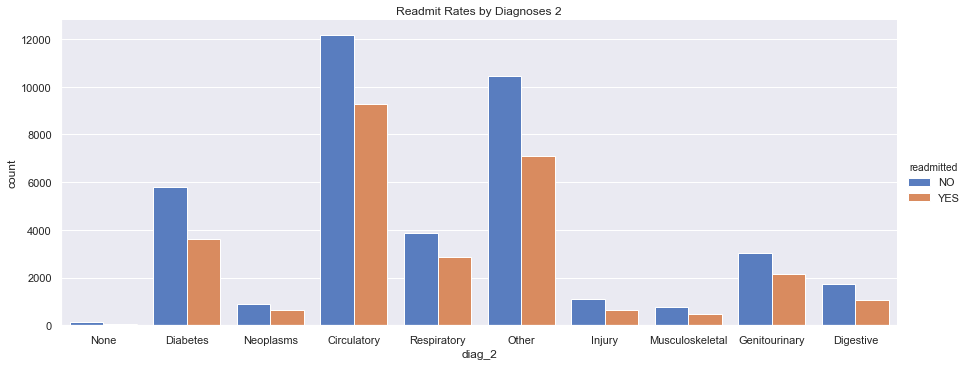

In [56]:
sns.catplot(x='diag_2', hue='readmitted', kind='count', palette='muted', aspect=2.5, data=diabetes)
plt.title('Readmit Rates by Diagnoses 2')
plt.show()

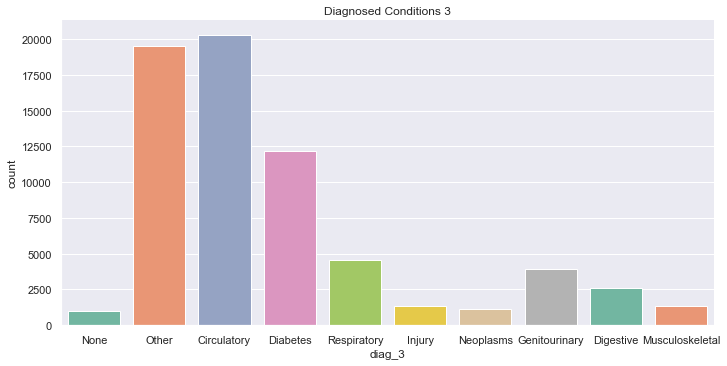

In [57]:
sns.catplot(x='diag_3', kind='count', palette='Set2', data=diabetes, aspect=2)
plt.title('Diagnosed Conditions 3')
plt.show()

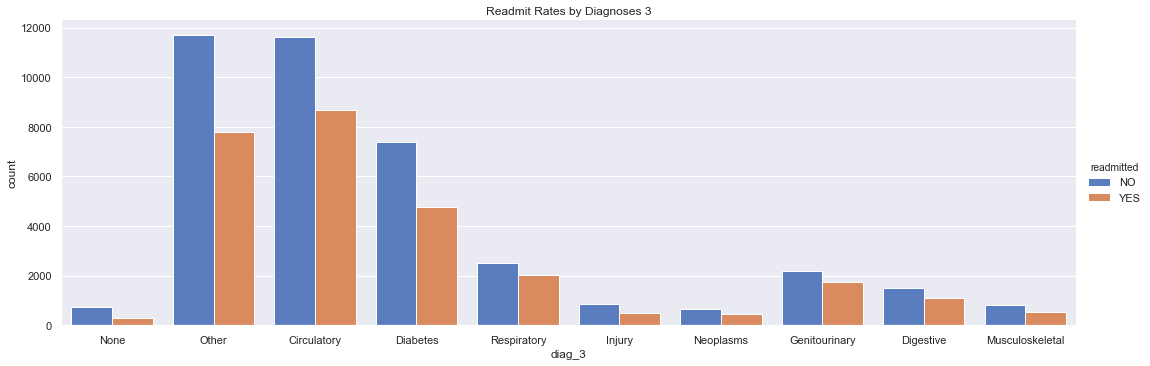

In [58]:
sns.catplot(x='diag_3', hue='readmitted', kind='count', palette='muted', aspect=3, data=diabetes)
plt.title('Readmit Rates by Diagnoses 3')
plt.show()

In [59]:
# drop diagnoses 2 and 3
diabetes = diabetes.drop(columns=['diag_2', 'diag_3'])

# number of diagnosed conditions

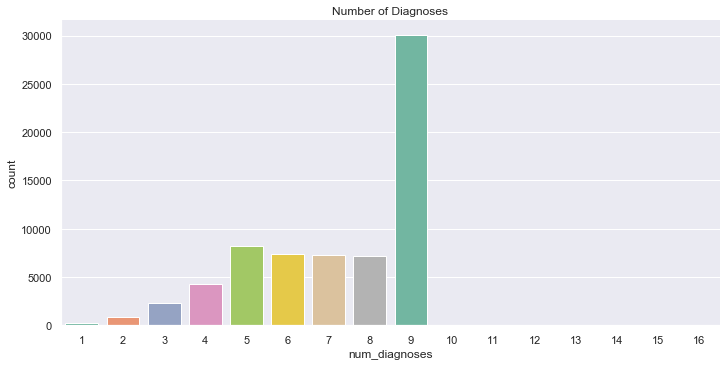

In [60]:
sns.catplot(x='num_diagnoses', kind='count', palette='Set2', data=diabetes, aspect=2)
plt.title('Number of Diagnoses')
plt.show()

In [61]:
print('Number of Diagnoses:')
print('Average: {} diagnoses'.format(round(np.mean(diabetes.num_diagnoses), 2)))
print('Median: {} diagnoses'.format(round(np.median(diabetes.num_diagnoses), 2)))

Number of Diagnoses:
Average: 7.25 diagnoses
Median: 8.0 diagnoses


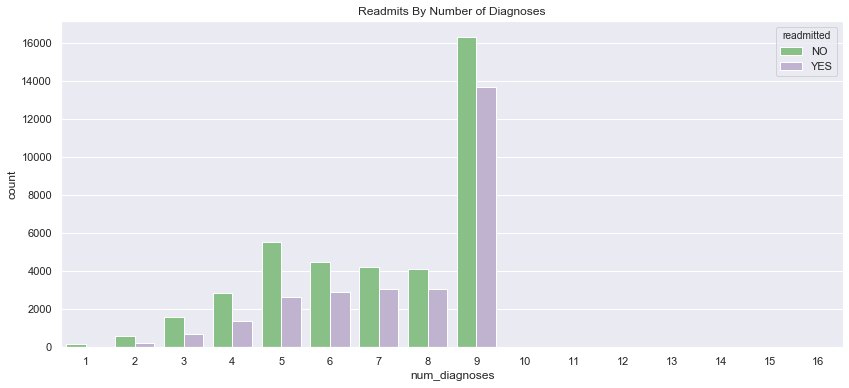

In [62]:
# number of diagnoses and readmit rate
plt.figure(figsize=(14, 6))
sns.countplot(x='num_diagnoses', hue='readmitted', palette='Accent', data=diabetes)
plt.title('Readmits By Number of Diagnoses')
plt.show()

In [63]:
diabetes.num_diagnoses.describe()

count    67874.000000
mean         7.245293
std          1.994228
min          1.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         16.000000
Name: num_diagnoses, dtype: float64

In [64]:
diabetes.groupby('readmitted')['num_diagnoses'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,40000.0,7.065150,2.061519,1.0,5.0,8.0,9.0,16.0
YES,27874.0,7.503803,1.863340,1.0,6.0,8.0,9.0,16.0


In [65]:
# number of diagnoses
chart_display(diabetes.readmitted, diabetes.num_diagnoses)

num_diagnoses,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Total
readmitted,,,,,,,,,,,,,,,,,
NO,154,598,1591,2874,5557,4481,4224,4138,16343,6,2,3,6,2,3,18,40000
YES,34,245,686,1410,2660,2932,3081,3079,13720,2,4,3,4,3,2,9,27874
Total,188,843,2277,4284,8217,7413,7305,7217,30063,8,6,6,10,5,5,27,67874


Most patients have up to nine diagnosed conditions during their visit, after that, only a handful have more than nine in one visit.

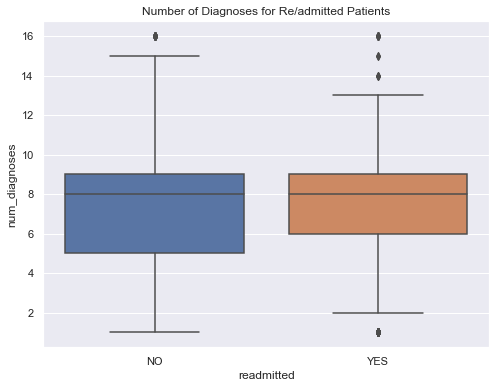

In [66]:
# how many diagnoses do readmitted patients have?
plt.figure(figsize=(8, 6))
sns.boxplot(x='readmitted', y='num_diagnoses', data=diabetes)
plt.title('Number of Diagnoses for Re/admitted Patients')
plt.show()

# glucose serum test results

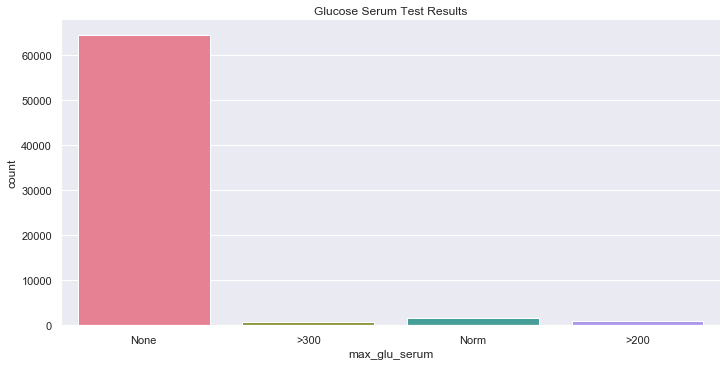

In [67]:
sns.catplot(x='max_glu_serum', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('Glucose Serum Test Results')
plt.show()

Since the majority of patients do not have a glucose reading, they will be excluded for the next graph in order to show the readmit rates for patients who do have a reading.

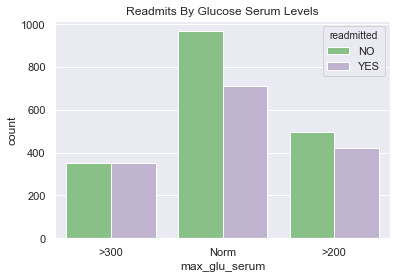

In [68]:
# exclude patients without a glucose reading
glucose_none = diabetes[diabetes.max_glu_serum != 'None']

# glucose serum results and readmit impact
sns.countplot(x='max_glu_serum', hue='readmitted', palette='Accent', data=glucose_none)
plt.title('Readmits By Glucose Serum Levels')
plt.show()

Patients with a glucose serum reading of over 300 have a 50-50 chance of being readmitted. High blood sugar levels are often dangerous for older patients due to the medical complications involved, so it's understandable that more patients return to the hospital for additional care.

In [69]:
chart_display(diabetes.readmitted, diabetes.max_glu_serum)

max_glu_serum,>200,>300,None,Norm,Total
readmitted,,,,,
NO,498,352,38183,967,40000
YES,421,351,26393,709,27874
Total,919,703,64576,1676,67874


# HbA1C results

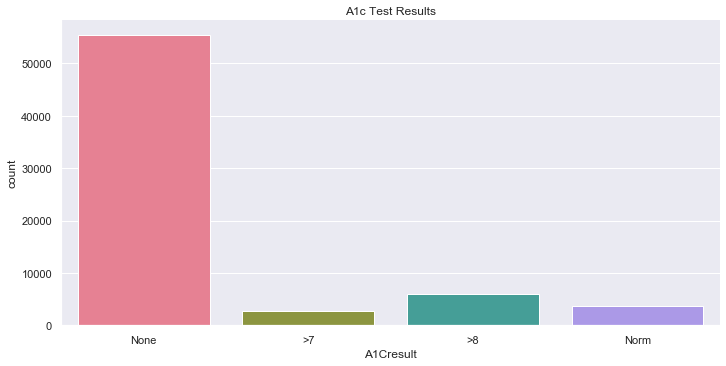

In [70]:
sns.catplot(x='A1Cresult', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('A1c Test Results')
plt.show()

Similar to the glucose reading, the majority of patients also do not have a HbA1c test reading. In order to understand the impact of HbA1c tests on readmit rates, patients without a reading will be excluded in the graph below.

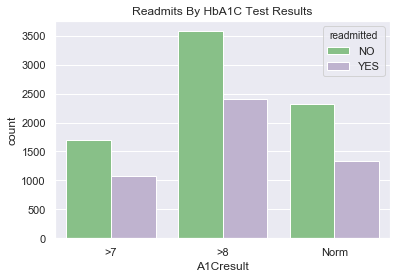

In [71]:
# exclude patients without an A1C reading
alc_none = diabetes[diabetes.A1Cresult != 'None']

# A1C results and readmit impact
sns.countplot(x='A1Cresult', hue='readmitted', palette='Accent', data=alc_none)
plt.title('Readmits By HbA1C Test Results')
plt.show()

In [72]:
chart_display(diabetes.readmitted, diabetes.A1Cresult)

A1Cresult,>7,>8,None,Norm,Total
readmitted,,,,,
NO,1702,3577,32403,2318,40000
YES,1083,2412,23040,1339,27874
Total,2785,5989,55443,3657,67874


# medications

Let's take a look at changes in medications and diabetes medications.

## change in medications, dosage or brand

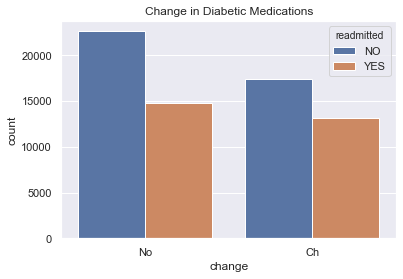

In [73]:
# change in medications
sns.countplot(x='change', hue='readmitted', data=diabetes)
plt.title('Change in Diabetic Medications')
plt.show()

In [74]:
chart_display(diabetes.change, diabetes.readmitted)

readmitted,NO,YES,Total
change,,,
Ch,17367,13131,30498
No,22633,14743,37376
Total,40000,27874,67874


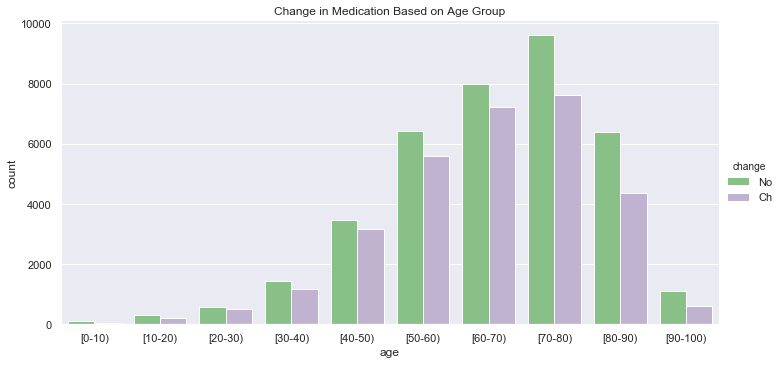

In [75]:
# who is likely to have a change in medication?
sns.catplot(x='age', hue='change', kind='count', palette='Accent', aspect=2, data=diabetes)
plt.title('Change in Medication Based on Age Group')
plt.show()

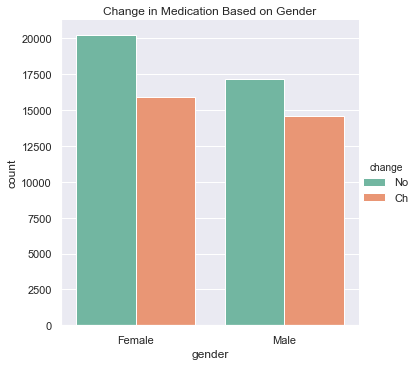

In [76]:
# who is likely to have a change in medication?
sns.catplot(x='gender', hue='change', kind='count', palette='Set2', data=diabetes)
plt.title('Change in Medication Based on Gender')
plt.show()

In [77]:
chart_display(diabetes.gender, diabetes.change)

change,Ch,No,Total
gender,,,
Female,15928,20236,36164
Male,14570,17140,31710
Total,30498,37376,67874


## diabetic medications prescribed

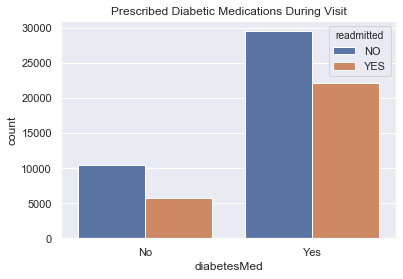

In [78]:
sns.countplot(x='diabetesMed', hue='readmitted', data=diabetes)
plt.title('Prescribed Diabetic Medications During Visit')
plt.show()

In [79]:
chart_display(diabetes.diabetesMed, diabetes.readmitted)

readmitted,NO,YES,Total
diabetesMed,,,
No,10476,5795,16271
Yes,29524,22079,51603
Total,40000,27874,67874


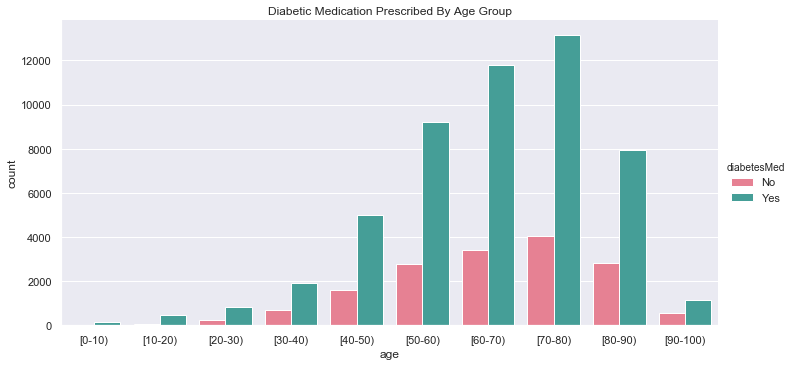

In [80]:
# which age group is likely to have a change in diabetes medication?
sns.catplot(x='age', hue='diabetesMed', kind='count', palette='husl', aspect=2, data=diabetes)
plt.title('Diabetic Medication Prescribed By Age Group')
plt.show()

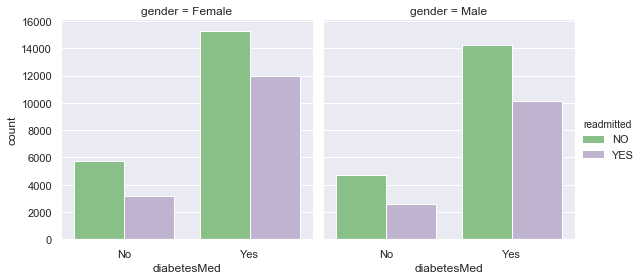

In [81]:
# who is likely or not likely to have a change in medication?
sns.catplot(x='diabetesMed', hue='readmitted', col='gender', palette='Accent', data=diabetes, kind='count', height=4, aspect=1)
plt.show()

## medications used by patients

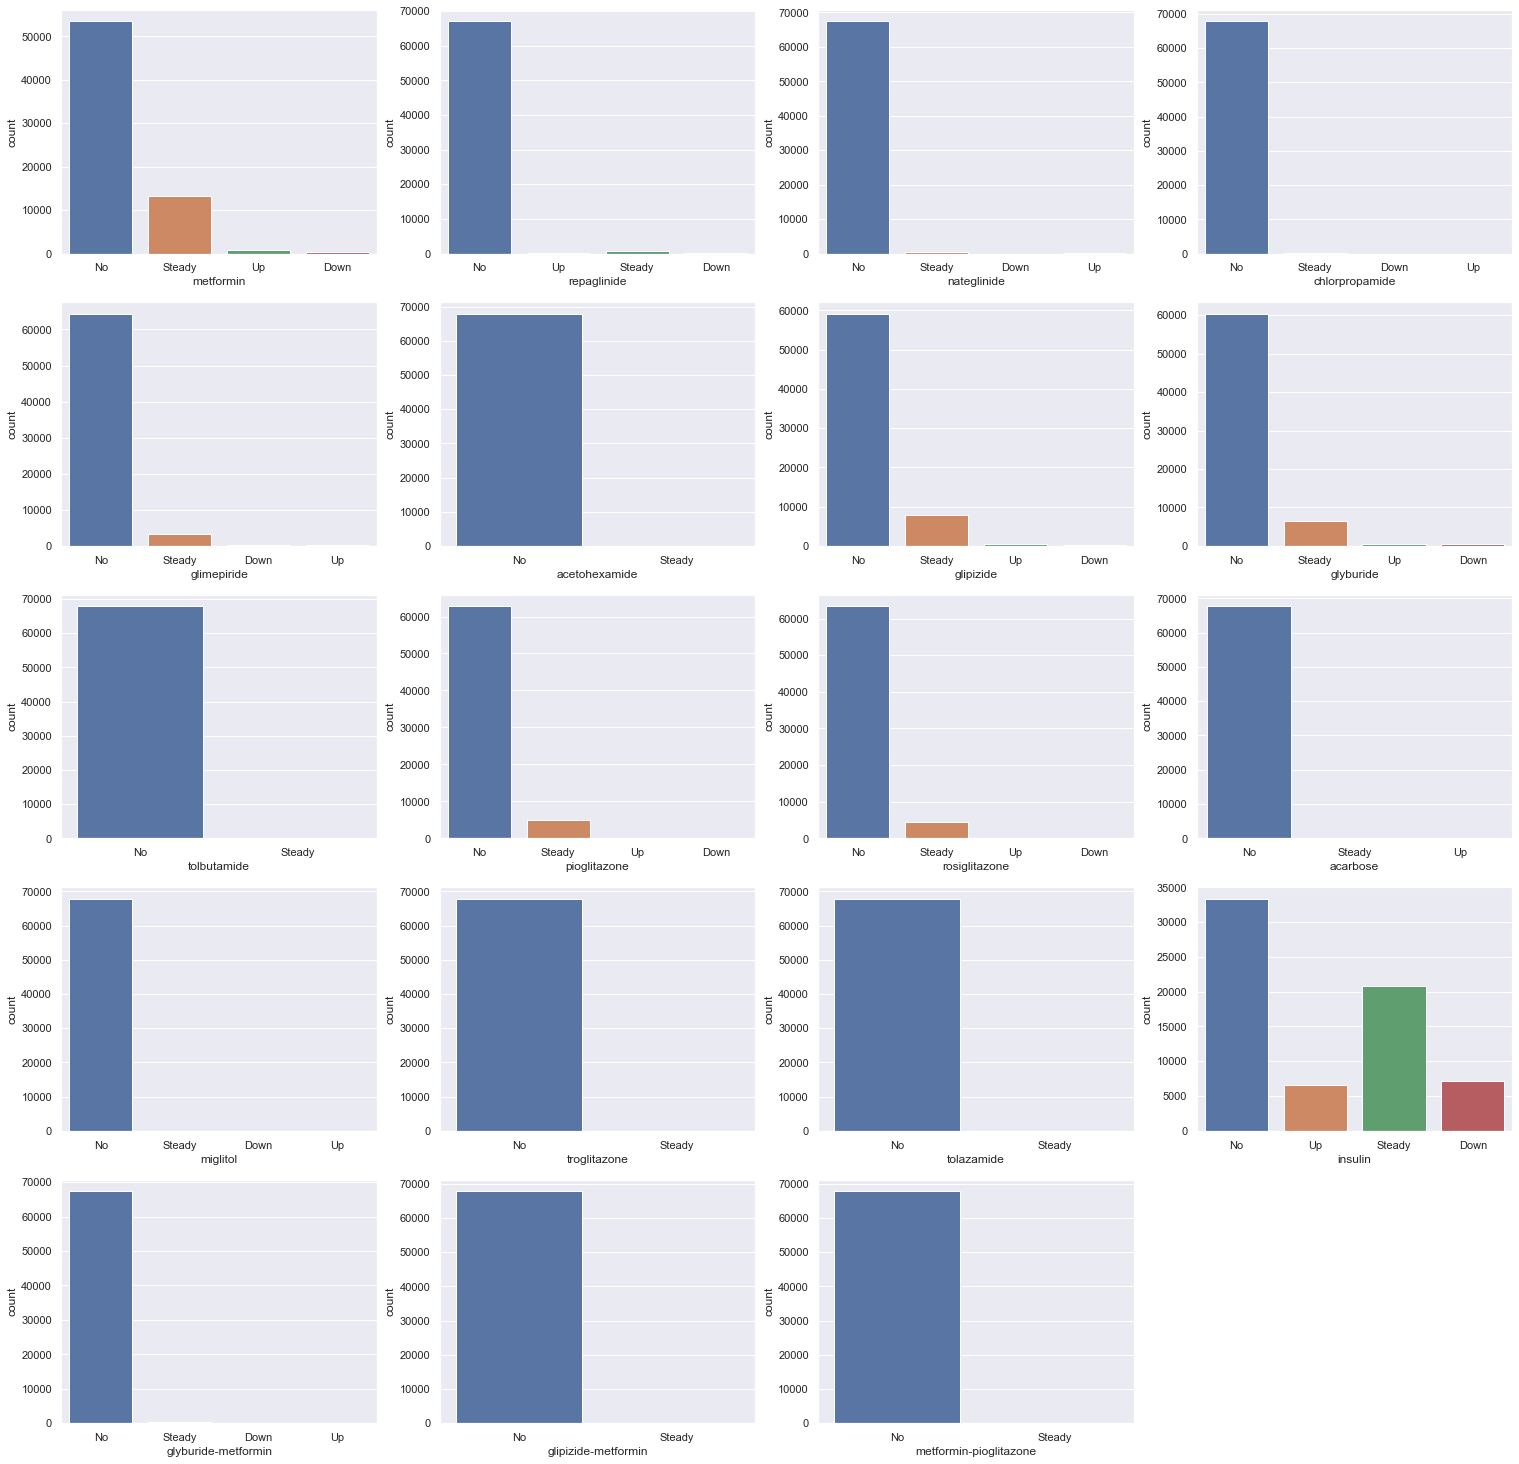

In [82]:
plt.figure(figsize=(26, 26))
plt.subplot(541)
sns.countplot(x='metformin', data=diabetes)
plt.subplot(542)
sns.countplot(x='repaglinide', data=diabetes)
plt.subplot(543)
sns.countplot(x='nateglinide', data=diabetes)
plt.subplot(544)
sns.countplot(x='chlorpropamide', data=diabetes)
plt.subplot(545)
sns.countplot(x='glimepiride', data=diabetes)
plt.subplot(546)
sns.countplot(x='acetohexamide', data=diabetes)
plt.subplot(547)
sns.countplot(x='glipizide', data=diabetes)
plt.subplot(548)
sns.countplot(x='glyburide', data=diabetes)
plt.subplot(549)
sns.countplot(x='tolbutamide', data=diabetes)
plt.subplot(5,4,10)
sns.countplot(x='pioglitazone', data=diabetes)
plt.subplot(5,4,11)
sns.countplot(x='rosiglitazone', data=diabetes)
plt.subplot(5,4,12)
sns.countplot(x='acarbose', data=diabetes)
plt.subplot(5,4,13)
sns.countplot(x='miglitol', data=diabetes)
plt.subplot(5,4,14)
sns.countplot(x='troglitazone', data=diabetes)
plt.subplot(5,4,15)
sns.countplot(x='tolazamide', data=diabetes)
plt.subplot(5,4,16)
sns.countplot(x='insulin', data=diabetes)
plt.subplot(5,4,17)
sns.countplot(x='glyburide-metformin', data=diabetes)
plt.subplot(5,4,18)
sns.countplot(x='glipizide-metformin', data=diabetes)
plt.subplot(5,4,19)
sns.countplot(x='metformin-pioglitazone', data=diabetes)
plt.show()

Dosages for insulin shows the most activity out of all diabetic medications, most of which aren't prescribed to patients.

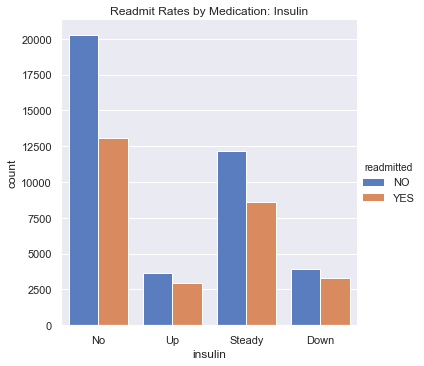

In [83]:
sns.catplot(x='insulin', hue='readmitted', kind='count', palette='muted', data=diabetes)
plt.title('Readmit Rates by Medication: Insulin')
plt.show()

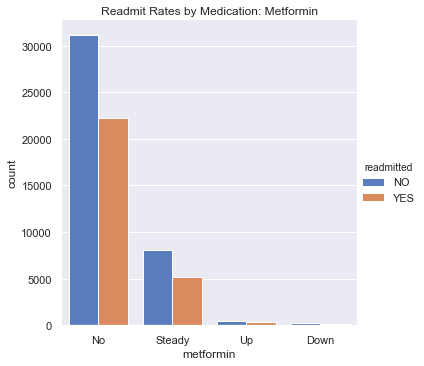

In [84]:
sns.catplot(x='metformin', hue='readmitted', kind='count', palette='muted', data=diabetes)
plt.title('Readmit Rates by Medication: Metformin')
plt.show()

In [85]:
diabetes = diabetes.reset_index(drop=True)

# numerical outliers

After creating visualizations for our data, many variables have outliers that skew the graphs. In order to represent the majority of samples and build clean models, we are going to remove outliers that have [z-scores](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/) greater than 3.0 or less than -3.0. This means that we are removing samples that are more (or less) than 3 times the standard deviation from the mean.

In [86]:
# view stats
round(diabetes.describe(), 2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses
count,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00
mean,4.28,42.85,1.43,15.67,0.28,0.11,0.18,7.25
std,2.94,19.93,1.76,8.28,1.07,0.52,0.61,1.99
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
25%,2.00,31.00,0.00,10.00,0.00,0.00,0.00,6.00
50%,3.00,44.00,1.00,14.00,0.00,0.00,0.00,8.00
75%,6.00,57.00,2.00,20.00,0.00,0.00,0.00,9.00
max,14.00,132.00,6.00,81.00,42.00,42.00,12.00,16.00


In [87]:
diabetes.shape

(67874, 37)

In [88]:
# create columns for z scores
num_var = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'num_outpatient', 'num_emergency', 'num_inpatient', 'num_diagnoses']

for x in num_var: # new column with z score
    diabetes[x + '_z'] = np.abs(stats.zscore(diabetes[x]))
    
# view result
diabetes.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,...,readmitted,admission_type,time_in_hospital_z,num_lab_procedures_z,num_procedures_z,num_medications_z,num_outpatient_z,num_emergency_z,num_inpatient_z,num_diagnoses_z
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,...,NO,Unknown,1.115787,0.092757,0.813102,1.771978,0.263790,0.204776,0.294513,3.131708
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,YES,Emergency,0.434478,0.810240,0.813102,0.281411,0.263790,0.204776,0.294513,0.879900
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,...,NO,Emergency,0.775133,1.597751,2.034807,0.322527,1.597573,0.204776,1.356987,0.624453
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,NO,Emergency,0.775133,0.057742,0.243520,0.039836,0.263790,0.204776,0.294513,0.123002
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,NO,Emergency,1.115787,0.408908,0.813102,0.926465,0.263790,0.204776,0.294513,1.125904


In [89]:
# remove rows for each variable where z > 3 or z < -3
zs = ['time_in_hospital_z', 'num_lab_procedures_z', 'num_procedures_z', 'num_medications_z', 'num_outpatient_z', 'num_emergency_z', 'num_inpatient_z', 'num_diagnoses_z']

for x in zs:
    diabetes = diabetes[(diabetes[x] < 3)]
    diabetes = diabetes[(diabetes[x] > -3)]

diabetes.shape

(61678, 45)

In [90]:
# drop z columns
diabetes = diabetes.drop(columns=['time_in_hospital_z', 'num_lab_procedures_z', 'num_procedures_z', 'num_medications_z', 'num_outpatient_z', 'num_emergency_z', 'num_inpatient_z', 'num_diagnoses_z'])

# cleaned dataset
diabetes.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,No,No,Up,No,No,No,Ch,Yes,YES,Emergency
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,...,No,No,No,No,No,No,No,Yes,NO,Emergency
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,No,No,Up,No,No,No,Ch,Yes,NO,Emergency
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,No,No,Steady,No,No,No,Ch,Yes,NO,Emergency
5,Caucasian,Male,[50-60),3,31,6,16,0,0,0,...,No,No,Steady,No,No,No,No,Yes,YES,Urgent


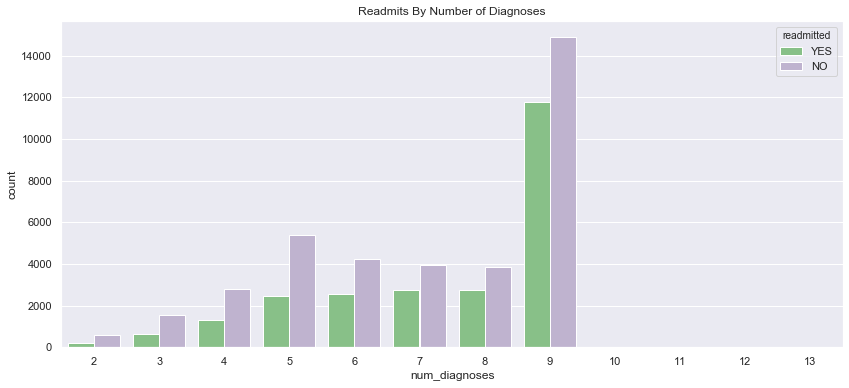

In [91]:
# number of diagnoses and readmit rate
plt.figure(figsize=(14, 6))
sns.countplot(x='num_diagnoses', hue='readmitted', palette='Accent', data=diabetes)
plt.title('Readmits By Number of Diagnoses')
plt.show()

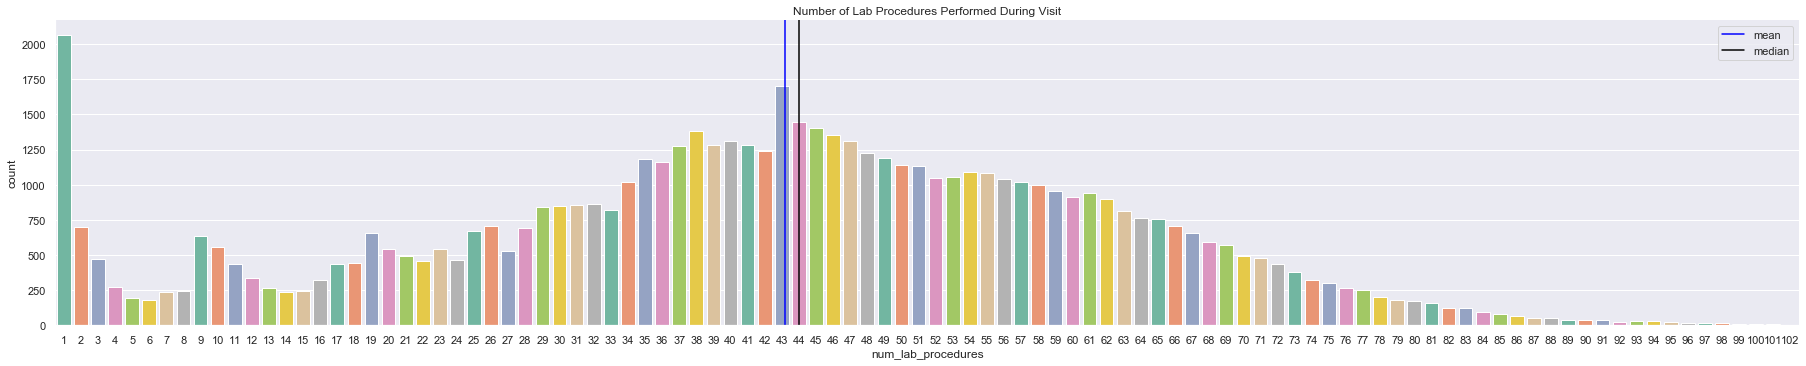

In [92]:
sns.catplot(x='num_lab_procedures', kind='count', palette='Set2', data=diabetes, aspect=5)
plt.axvline(np.mean(diabetes.num_lab_procedures), color='blue', label='mean')
plt.axvline(np.median(diabetes.num_lab_procedures), color='black', label='median')
plt.title('Number of Lab Procedures Performed During Visit')
plt.legend()
plt.show()

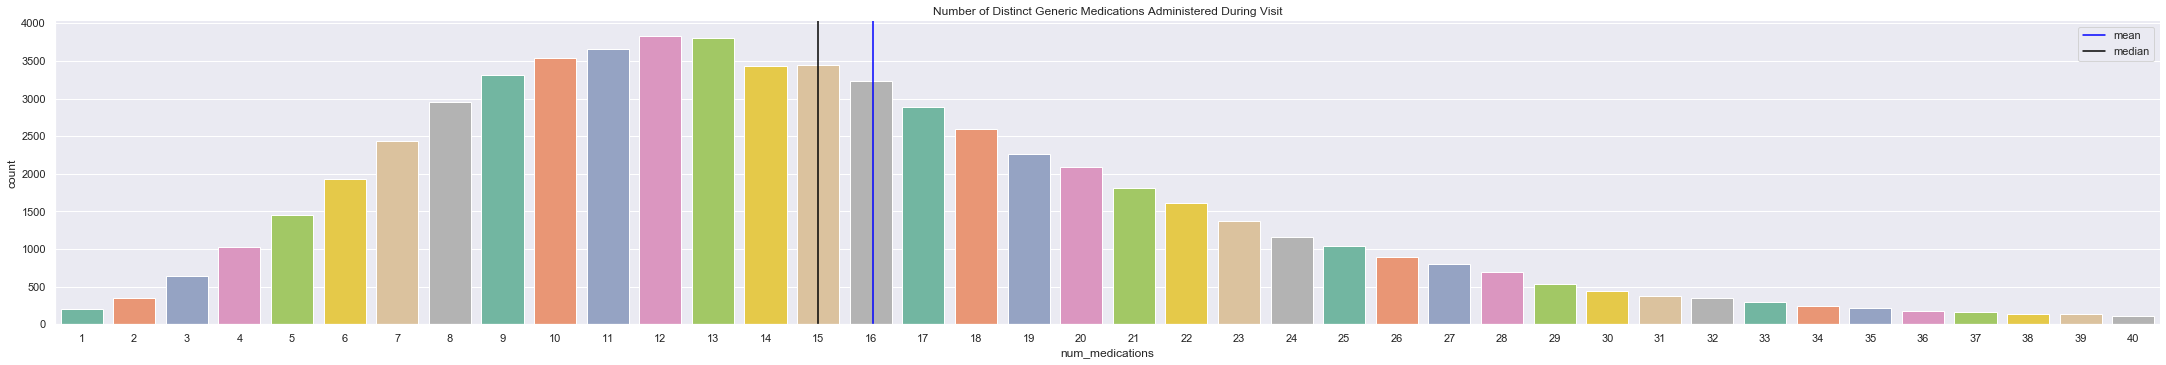

In [93]:
sns.catplot(x='num_medications', kind='count', palette='Set2', data=diabetes, aspect=6)
plt.axvline(np.mean(diabetes.num_medications), color='blue', label='mean')
plt.axvline(np.median(diabetes.num_medications), color='black', label='median')
plt.title('Number of Distinct Generic Medications Administered During Visit')
plt.legend()
plt.show()

# save cleaned dataset

In [94]:
diabetes = diabetes.reset_index(drop=True)

In [95]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61678 entries, 0 to 61677
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   race                    61678 non-null  object
 1   gender                  61678 non-null  object
 2   age                     61678 non-null  object
 3   time_in_hospital        61678 non-null  int64 
 4   num_lab_procedures      61678 non-null  int64 
 5   num_procedures          61678 non-null  int64 
 6   num_medications         61678 non-null  int64 
 7   num_outpatient          61678 non-null  int64 
 8   num_emergency           61678 non-null  int64 
 9   num_inpatient           61678 non-null  int64 
 10  diag_1                  61678 non-null  object
 11  num_diagnoses           61678 non-null  int64 
 12  max_glu_serum           61678 non-null  object
 13  A1Cresult               61678 non-null  object
 14  metformin               61678 non-null  object
 15  re

In [96]:
# save cleaned dataset to new file
# diabetes.to_csv('diabetes_analysis.csv')